## Load datasets

In [1]:
import pandas as pd
data_path = 'datasets_'
# node_paths_dir = 'data_preprocessing/preprocessed_datasets/debug_datasets'

In [2]:
df = pd.read_csv(f'{data_path}/MSR.csv')
nan_counts = df.isna().sum()
print("Before dropping nan\n",nan_counts)
df = df.drop_duplicates()
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
nan_counts = df.isna().sum()
print("After dropping nan\n",nan_counts)
df

Before dropping nan
 Unnamed: 0        0
code              0
cwe_id            0
cve_id        12638
vul               0
dtype: int64
After dropping nan
 code      0
cwe_id    0
cve_id    0
vul       0
dtype: int64


,code,cwe_id,cve_id,vul
0,static PHP_FUNCTION(preg_match)\n{\n\tphp_do_p...,119,CVE-2015-8382,0
1,static PHP_FUNCTION(preg_match_all)\n{\n\tphp_...,119,CVE-2015-8382,0
2,static PHP_FUNCTION(preg_replace)\n{\n\tpreg_r...,119,CVE-2015-8382,0
3,static PHP_FUNCTION(preg_replace_callback)\n{\...,119,CVE-2015-8382,0
4,static PHP_FUNCTION(preg_filter)\n{\n\tpreg_re...,119,CVE-2015-8382,0
...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1


In [3]:
CVEfixes_df = pd.read_csv(f'{data_path}/CVEfixes_new.csv')
nan_counts = CVEfixes_df.isna().sum()
print("Before dropping nan\n",nan_counts)
CVEfixes_df = CVEfixes_df.dropna()
nan_counts = CVEfixes_df.isna().sum()
print("After dropping nan\n",nan_counts)
CVEfixes_df = CVEfixes_df.drop_duplicates()
CVEfixes_df['vul'] = CVEfixes_df['vul'].astype(int)
CVEfixes_df['cwe_id'] = CVEfixes_df['cwe_id'].astype(int)
CVEfixes_df

Before dropping nan
 code      20
cwe_id    20
cve_id    20
vul       20
dtype: int64
After dropping nan
 code      0
cwe_id    0
cve_id    0
vul       0
dtype: int64


,code,cwe_id,cve_id,vul
0,"getlogin_r (name, name_len)\n char *name;\...",252,CVE-1999-0199,1
1,"getlogin_r (name, name_len)\n char *name;\...",252,CVE-1999-0199,1
2,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1
4,main (void)\n{\n char *login;\n int errors =...,252,CVE-1999-0199,1
...,...,...,...,...
68851,"pam_converse (int num_msg, PAM_CONVERSE_ARG2_T...",763,CVE-2022-37451,1
68852,"host_name_lookup(void)\n{\nint old_pool, rc;\n...",787,CVE-2022-37452,1
68853,"host_name_lookup(void)\n{\nint old_pool, rc;\n...",787,CVE-2022-37452,1
68854,host_name_lookup_byaddr(void)\n{\nstruct hoste...,787,CVE-2022-37452,1


In [4]:
ll = CVEfixes_df['code'].head(2).tolist()
print(ll[0])

getlogin_r (name, name_len)
     char *name;
     size_t name_len;
{
  char tty_pathname[2 + 2 * NAME_MAX];
  char *real_tty_path = tty_pathname;
  int result = 0;
  struct utmp *ut, line, buffer;

  /* Get name of tty connected to fd 0.  Return if not a tty or
     if fd 0 isn't open.  Note that a lot of documentation says that
     getlogin() is based on the controlling terminal---what they
     really mean is "the terminal connected to standard input".  The
     getlogin() implementation of DEC Unix, SunOS, Solaris, HP-UX all
     return NULL if fd 0 has been closed, so this is the compatible
     thing to do.  Note that ttyname(open("/dev/tty")) on those
     systems returns /dev/tty, so that is not a possible solution for
     getlogin().  */

  result = __ttyname_r (0, real_tty_path, sizeof (tty_pathname));
  
  if (result != 0)
    return result;

  real_tty_path += 5;		/* Remove "/dev/".  */

  __setutent ();
  strncpy (line.ut_line, real_tty_path, sizeof line.ut_line);
  if (_

In [5]:
print(ll[1])

getlogin_r (name, name_len)
     char *name;
     size_t name_len;
{
  char tty_pathname[2 + 2 * NAME_MAX];
  char *real_tty_path = tty_pathname;
  int result = 0;
  struct utmp *ut, line, buffer;

  {
    int d = __open ("/dev/tty", 0);
    if (d < 0)
      return errno;

    result = __ttyname_r (d, real_tty_path, sizeof (tty_pathname));
    (void) __close (d);

    if (result != 0)
      {
	__set_errno (result);
	return result;
      }
  }

  real_tty_path += 5;		/* Remove "/dev/".  */

  __setutent ();
  strncpy (line.ut_line, real_tty_path, sizeof line.ut_line);
  if (__getutline_r (&line, &buffer, &ut) < 0)
    {
      if (errno == ESRCH)
	/* The caller expects ENOENT if nothing is found.  */
	result = ENOENT;
      else
	result = errno;
    }
  else
    {
      size_t needed = strlen (ut->ut_line) + 1;

      if (needed < name_len)
	{
	  __set_errno (ERANGE);
	  result = ERANGE;
	}
      else
	{
	  memcpy (name, ut->ut_line, needed);
	  result = 0;
	}
    }
  __endutent ();

  r

## Analysis 
* CVE ID value counts
* CVE ID overlap between two datasets

In [6]:
CVEfixes_df['cve_id'].value_counts()

CVE-2016-10096    6767
CVE-2021-27341    2252
CVE-2021-27340    2252
CVE-2021-4097     2237
CVE-2022-1727     1886
                  ... 
CVE-2016-2782        1
CVE-2021-37517       1
CVE-2022-1351        1
CVE-2017-13005       1
CVE-2021-29553       1
Name: cve_id, Length: 5297, dtype: int64

In [7]:
df['cve_id'].value_counts()

CVE-2016-5219     1520
CVE-2017-5120     1064
CVE-2012-5148     1053
CVE-2012-2875     1029
CVE-2018-13006     931
                  ... 
CVE-2017-17853       1
CVE-2016-3747        1
CVE-2017-16531       1
CVE-2010-1797        1
CVE-2017-13187       1
Name: cve_id, Length: 2858, dtype: int64

In [8]:
list1 = CVEfixes_df['cve_id'].value_counts().index.tolist()
list1

['CVE-2016-10096',
 'CVE-2021-27341',
 'CVE-2021-27340',
 'CVE-2021-4097',
 'CVE-2022-1727',
 'CVE-2022-1730',
 'CVE-2020-15211',
 'CVE-2014-1944',
 'CVE-2020-26301',
 'CVE-2018-11512',
 'CVE-2013-2025',
 'CVE-2022-2014',
 'CVE-2022-2015',
 'CVE-2015-4411',
 'CVE-2015-2972',
 'CVE-2015-4410',
 'CVE-2020-5219',
 'CVE-2019-19274',
 'CVE-2021-3121',
 'CVE-2019-19275',
 'CVE-2016-9020',
 'CVE-2016-7781',
 'CVE-2016-8899',
 'CVE-2016-7788',
 'CVE-2016-8897',
 'CVE-2016-8900',
 'CVE-2016-9087',
 'CVE-2015-5074',
 'CVE-2015-5076',
 'CVE-2016-0721',
 'CVE-2020-15222',
 'CVE-2021-41118',
 'CVE-2017-16806',
 'CVE-2022-2306',
 'CVE-2018-17552',
 'CVE-2021-26788',
 'CVE-2021-39177',
 'CVE-2021-23758',
 'CVE-2021-25981',
 'CVE-2022-0990',
 'CVE-2022-0939',
 'CVE-2016-10766',
 'CVE-2019-16785',
 'CVE-2020-26759',
 'CVE-2011-2918',
 'CVE-2020-7769',
 'CVE-2019-10765',
 'CVE-2019-16771',
 'CVE-2019-15694',
 'CVE-2016-5770',
 'CVE-2021-39181',
 'CVE-2020-10683',
 'CVE-2016-4303',
 'CVE-2022-23617',
 'C

In [9]:
list2 = df['cve_id'].value_counts().index.tolist()
list2

['CVE-2016-5219',
 'CVE-2017-5120',
 'CVE-2012-5148',
 'CVE-2012-2875',
 'CVE-2018-13006',
 'CVE-2017-9059',
 'CVE-2017-5019',
 'CVE-2016-3839',
 'CVE-2015-6763',
 'CVE-2013-0886',
 'CVE-2017-5112',
 'CVE-2017-6903',
 'CVE-2018-16427',
 'CVE-2018-6063',
 'CVE-2018-6096',
 'CVE-2013-0904',
 'CVE-2013-7271',
 'CVE-2011-4930',
 'CVE-2016-1621',
 'CVE-2015-1265',
 'CVE-2018-18352',
 'CVE-2012-2816',
 'CVE-2017-5009',
 'CVE-2016-10066',
 'CVE-2012-3552',
 'CVE-2012-2880',
 'CVE-2011-2350',
 'CVE-2017-5118',
 'CVE-2016-5170',
 'CVE-2012-2895',
 'CVE-2018-12714',
 'CVE-2011-4621',
 'CVE-2016-3751',
 'CVE-2016-1683',
 'CVE-2014-3173',
 'CVE-2017-5061',
 'CVE-2011-4324',
 'CVE-2018-6111',
 'CVE-2017-14604',
 'CVE-2016-2464',
 'CVE-2018-20784',
 'CVE-2017-5093',
 'CVE-2016-9557',
 'CVE-2011-3055',
 'CVE-2016-2476',
 'CVE-2011-2861',
 'CVE-2015-6773',
 'CVE-2011-2840',
 'CVE-2011-3896',
 'CVE-2012-5136',
 'CVE-2013-1929',
 'CVE-2018-17205',
 'CVE-2018-17206',
 'CVE-2015-6787',
 'CVE-2014-3645',
 

In [10]:
inter = set.intersection(set(list1), set(list2))
len(inter)

1391

In [11]:
inter

{'CVE-2015-8963',
 'CVE-2016-8884',
 'CVE-2018-11384',
 'CVE-2018-13302',
 'CVE-2018-11506',
 'CVE-2014-3185',
 'CVE-2017-7862',
 'CVE-2016-6197',
 'CVE-2016-5351',
 'CVE-2019-17533',
 'CVE-2013-3232',
 'CVE-2015-8956',
 'CVE-2017-16803',
 'CVE-2016-10030',
 'CVE-2016-4805',
 'CVE-2018-16839',
 'CVE-2017-12665',
 'CVE-2016-9313',
 'CVE-2018-20855',
 'CVE-2017-7863',
 'CVE-2017-14056',
 'CVE-2018-18021',
 'CVE-2017-9990',
 'CVE-2017-16531',
 'CVE-2019-15140',
 'CVE-2014-3182',
 'CVE-2016-5093',
 'CVE-2017-13139',
 'CVE-2019-13297',
 'CVE-2015-0206',
 'CVE-2018-1999013',
 'CVE-2016-6136',
 'CVE-2015-4054',
 'CVE-2016-5728',
 'CVE-2017-5970',
 'CVE-2017-14140',
 'CVE-2016-7480',
 'CVE-2017-6874',
 'CVE-2019-15026',
 'CVE-2013-3234',
 'CVE-2017-12895',
 'CVE-2007-6761',
 'CVE-2013-2232',
 'CVE-2018-18445',
 'CVE-2018-13094',
 'CVE-2017-10810',
 'CVE-2017-17855',
 'CVE-2018-19045',
 'CVE-2012-6549',
 'CVE-2017-5985',
 'CVE-2011-3602',
 'CVE-2014-5472',
 'CVE-2017-5576',
 'CVE-2016-5770',
 '

In [12]:
code = df[df['cve_id']=='CVE-2017-12190'].tail(1)['code'].tolist()

In [13]:
print(code[0])

struct bio *bio_map_user_iov(struct request_queue *q,
			     const struct iov_iter *iter,
			     gfp_t gfp_mask)
{
	int j;
	int nr_pages = 0;
	struct page **pages;
	struct bio *bio;
	int cur_page = 0;
 	int ret, offset;
 	struct iov_iter i;
 	struct iovec iov;
 
 	iov_for_each(iov, i, *iter) {
 		unsigned long uaddr = (unsigned long) iov.iov_base;
		unsigned long len = iov.iov_len;
		unsigned long end = (uaddr + len + PAGE_SIZE - 1) >> PAGE_SHIFT;
		unsigned long start = uaddr >> PAGE_SHIFT;

		/*
		 * Overflow, abort
		 */
		if (end < start)
			return ERR_PTR(-EINVAL);

		nr_pages += end - start;
		/*
		 * buffer must be aligned to at least logical block size for now
		 */
		if (uaddr & queue_dma_alignment(q))
			return ERR_PTR(-EINVAL);
	}

	if (!nr_pages)
		return ERR_PTR(-EINVAL);

	bio = bio_kmalloc(gfp_mask, nr_pages);
	if (!bio)
		return ERR_PTR(-ENOMEM);

	ret = -ENOMEM;
	pages = kcalloc(nr_pages, sizeof(struct page *), gfp_mask);
	if (!pages)
		goto out;

	iov_for_each(iov, 

In [14]:
code2 = CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].tail(1)['code'].tolist()
print(code2[0])

struct bio *bio_map_user_iov(struct request_queue *q,
			     const struct iov_iter *iter,
			     gfp_t gfp_mask)
{
	int j;
	int nr_pages = 0;
	struct page **pages;
	struct bio *bio;
	int cur_page = 0;
	int ret, offset;
	struct iov_iter i;
	struct iovec iov;

	iov_for_each(iov, i, *iter) {
		unsigned long uaddr = (unsigned long) iov.iov_base;
		unsigned long len = iov.iov_len;
		unsigned long end = (uaddr + len + PAGE_SIZE - 1) >> PAGE_SHIFT;
		unsigned long start = uaddr >> PAGE_SHIFT;

		/*
		 * Overflow, abort
		 */
		if (end < start)
			return ERR_PTR(-EINVAL);

		nr_pages += end - start;
		/*
		 * buffer must be aligned to at least logical block size for now
		 */
		if (uaddr & queue_dma_alignment(q))
			return ERR_PTR(-EINVAL);
	}

	if (!nr_pages)
		return ERR_PTR(-EINVAL);

	bio = bio_kmalloc(gfp_mask, nr_pages);
	if (!bio)
		return ERR_PTR(-ENOMEM);

	ret = -ENOMEM;
	pages = kcalloc(nr_pages, sizeof(struct page *), gfp_mask);
	if (!pages)
		goto out;

	iov_for_each(iov, i, *it

In [15]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190']

,code,cwe_id,cve_id,vul
22152,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1
22153,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1


In [16]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].duplicated(keep=False)

22152    False
22153    False
dtype: bool

In [17]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190']

,code,cwe_id,cve_id,vul
22152,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1
22153,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1


In [18]:
cc = CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].code.tolist()
len(set(cc))

2

In [19]:
print(cc[0])

struct bio *bio_map_user_iov(struct request_queue *q,
			     const struct iov_iter *iter,
			     gfp_t gfp_mask)
{
	int j;
	int nr_pages = 0;
	struct page **pages;
	struct bio *bio;
	int cur_page = 0;
	int ret, offset;
	struct iov_iter i;
	struct iovec iov;
	struct bio_vec *bvec;

	iov_for_each(iov, i, *iter) {
		unsigned long uaddr = (unsigned long) iov.iov_base;
		unsigned long len = iov.iov_len;
		unsigned long end = (uaddr + len + PAGE_SIZE - 1) >> PAGE_SHIFT;
		unsigned long start = uaddr >> PAGE_SHIFT;

		/*
		 * Overflow, abort
		 */
		if (end < start)
			return ERR_PTR(-EINVAL);

		nr_pages += end - start;
		/*
		 * buffer must be aligned to at least logical block size for now
		 */
		if (uaddr & queue_dma_alignment(q))
			return ERR_PTR(-EINVAL);
	}

	if (!nr_pages)
		return ERR_PTR(-EINVAL);

	bio = bio_kmalloc(gfp_mask, nr_pages);
	if (!bio)
		return ERR_PTR(-ENOMEM);

	ret = -ENOMEM;
	pages = kcalloc(nr_pages, sizeof(struct page *), gfp_mask);
	if (!pages)
		goto out;

	i

In [20]:
print(cc[1])

struct bio *bio_map_user_iov(struct request_queue *q,
			     const struct iov_iter *iter,
			     gfp_t gfp_mask)
{
	int j;
	int nr_pages = 0;
	struct page **pages;
	struct bio *bio;
	int cur_page = 0;
	int ret, offset;
	struct iov_iter i;
	struct iovec iov;

	iov_for_each(iov, i, *iter) {
		unsigned long uaddr = (unsigned long) iov.iov_base;
		unsigned long len = iov.iov_len;
		unsigned long end = (uaddr + len + PAGE_SIZE - 1) >> PAGE_SHIFT;
		unsigned long start = uaddr >> PAGE_SHIFT;

		/*
		 * Overflow, abort
		 */
		if (end < start)
			return ERR_PTR(-EINVAL);

		nr_pages += end - start;
		/*
		 * buffer must be aligned to at least logical block size for now
		 */
		if (uaddr & queue_dma_alignment(q))
			return ERR_PTR(-EINVAL);
	}

	if (!nr_pages)
		return ERR_PTR(-EINVAL);

	bio = bio_kmalloc(gfp_mask, nr_pages);
	if (!bio)
		return ERR_PTR(-ENOMEM);

	ret = -ENOMEM;
	pages = kcalloc(nr_pages, sizeof(struct page *), gfp_mask);
	if (!pages)
		goto out;

	iov_for_each(iov, i, *it

## Combine two datasets

In [21]:
# Combine two DataFrames and drop duplicates
combined_df = pd.concat([CVEfixes_df, df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)
# Display rows with NaN values
nan_rows = combined_df[combined_df.isna().any(axis=1)]
print(nan_rows)
combined_df = combined_df.dropna()
print(combined_df.shape)

(201921, 4)
(201921, 4)
Empty DataFrame
Columns: [code, cwe_id, cve_id, vul]
Index: []
(201921, 4)


In [22]:
unique_values = combined_df.nunique()
unique_values

code      185198
cwe_id       178
cve_id      6764
vul            2
dtype: int64

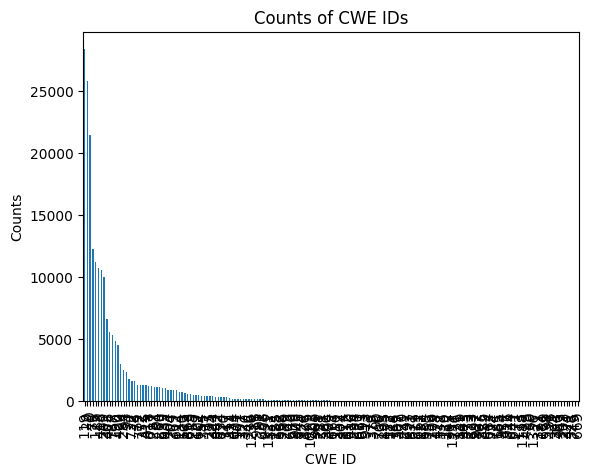

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique values in 'cwe_id' column
cwe_counts = combined_df['cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar')
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

## Reassign minor cwe_ids to level 3

54142


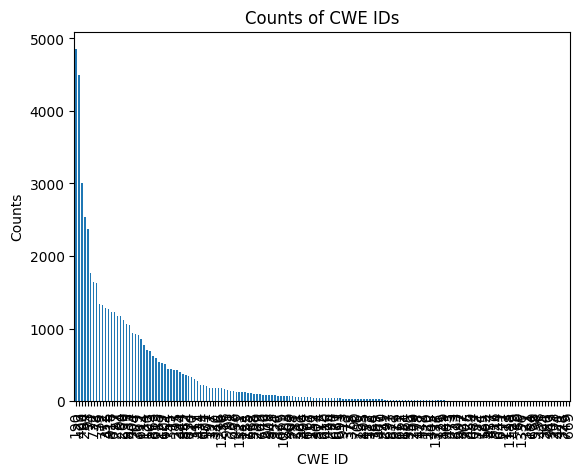

In [24]:
# Filter out 'cwe_id's with count less than 20
filtered_cwes = cwe_counts[cwe_counts < 5000]
print(filtered_cwes.sum())
# Plotting
filtered_cwes.plot(kind='bar')
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

18580


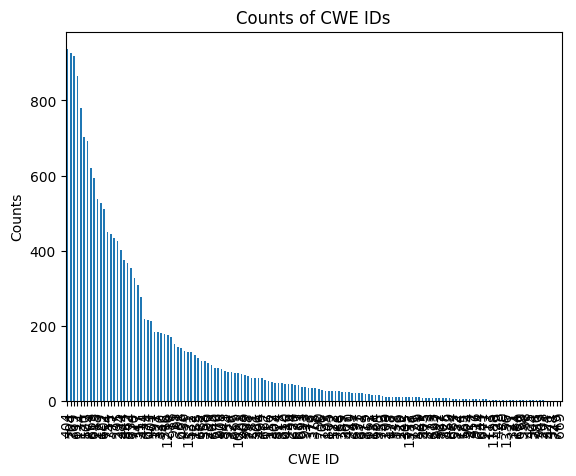

In [25]:
# Filter out 'cwe_id's with count less than minimum_cwe_cnt
minimum_cwe_cnt = 1000
filtered_cwes = cwe_counts[cwe_counts < minimum_cwe_cnt]
print(filtered_cwes.sum())
# Plotting
filtered_cwes.plot(kind='bar')
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

In [26]:
filtered_cwes_list = filtered_cwes.index.tolist()
filtered_cwes_list = sorted([int(item) for item in filtered_cwes_list])
print(len(filtered_cwes_list),filtered_cwes_list)

148 [23, 27, 73, 77, 80, 88, 90, 91, 98, 113, 116, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 191, 193, 203, 208, 209, 212, 241, 252, 273, 276, 277, 281, 285, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 324, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 354, 358, 359, 367, 369, 378, 379, 384, 401, 404, 425, 426, 427, 428, 434, 436, 444, 457, 459, 470, 471, 475, 494, 502, 521, 522, 532, 538, 552, 565, 601, 610, 611, 613, 640, 641, 644, 662, 664, 665, 667, 668, 669, 670, 672, 674, 680, 681, 682, 684, 693, 697, 704, 706, 707, 749, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 843, 862, 863, 908, 909, 913, 915, 916, 922, 924, 943, 1021, 1188, 1236, 1321, 1333, 1336]


In [27]:
import json
import pandas as pd

# Load the CWE paths from your JSON (Assuming it's stored in a variable named `cwe_paths_json`)
node_paths_dir = 'data_preprocessing/preprocessed_datasets/debug_datasets'
with open(f'{node_paths_dir}/graph_all_paths.json', 'r') as f:
    cwe_paths = json.load(f)

# Function to reassign CWEs to a higher level in the hierarchy
def reassign_cwe(cwe_id, level=3):
    # Find the path for the given CWE ID
    paths = cwe_paths.get(str(cwe_id), [])
    new_paths = []

    # Reassign to the specified level up in the hierarchy
    for path in paths:
        parts = path.split("-")
        if len(parts) > level:
            new_path = "-".join(parts[:level+1])
            new_paths.append(new_path)
        else:
            print(f"len(parts) <= level:{path}")
            new_paths.append(path)  # No reassignment if path is too short

    return new_paths

# Reassign the filtered CWEs
reassigned_cwe_paths = {}
for cwe_id in filtered_cwes_list:
    reassigned_cwe_paths[cwe_id] = reassign_cwe(cwe_id, level=3)

print("reassigned_cwe_paths",reassigned_cwe_paths)



len(parts) <= level:10000-1000-664
len(parts) <= level:10000-1000-682
len(parts) <= level:10000-1000-693
len(parts) <= level:10000-1000-697
len(parts) <= level:10000-1000-707
reassigned_cwe_paths {23: ['10000-1000-664-706'], 27: ['10000-1000-664-706'], 73: ['10000-1000-664-669', '10000-1000-664-610'], 77: ['10000-1000-707-74'], 80: ['10000-1000-707-74'], 88: ['10000-1000-707-74'], 90: ['10000-1000-707-74'], 91: ['10000-1000-707-74'], 98: ['10000-1000-664-706', '10000-1000-664-669'], 113: ['10000-1000-707-74', '10000-1000-435-436'], 116: ['10000-1000-707-116'], 120: ['10000-1000-664-118'], 121: ['10000-1000-664-118', '10000-1000-664-118'], 122: ['10000-1000-664-118', '10000-1000-664-118'], 126: ['10000-1000-664-118', '10000-1000-664-118'], 129: ['10000-1000-707-20'], 131: ['10000-1000-682-131'], 134: ['10000-1000-664-668'], 172: ['10000-1000-707-172'], 178: ['10000-1000-664-706'], 184: ['10000-1000-693-184', '10000-1000-697-1023'], 185: ['10000-1000-697-185'], 191: ['10000-1000-682-191'

In [28]:
# # Create a DataFrame from the reassigned CWE paths
# reassigned_df = pd.DataFrame([(k, v) for k, vs in reassigned_cwe_paths.items() for v in vs], columns=['CWE_ID', 'New_Path'])

# print(reassigned_df)

In [29]:
# Prepare a new mapping dictionary by getting the last element of each path
new_cwe_mapping = {k: v[-1].split('-')[-1] for k, v in reassigned_cwe_paths.items()if v}

# Use the mapping to create a new 're_cwe_id' column
# It maps the cwe_id to the last element in the path if it's in the new_cwe_mapping; otherwise, keeps the original cwe_id
combined_df['re_cwe_id'] = combined_df['cwe_id'].map(new_cwe_mapping).fillna(combined_df['cwe_id'])
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]
# combined_df['re_cwe_id']  = combined_df['re_cwe_id'].astype(int)


combined_df

,code,cwe_id,cve_id,vul,re_cwe_id
0,"getlogin_r (name, name_len)\n char *name;\...",252,CVE-1999-0199,1,754
1,"getlogin_r (name, name_len)\n char *name;\...",252,CVE-1999-0199,1,754
2,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1,754
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1,754
4,main (void)\n{\n char *login;\n int errors =...,252,CVE-1999-0199,1,754
...,...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1,119
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1,119
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1,200
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1,125


In [30]:
# Select and print rows where 'cwe_id' and 're_cwe_id' are different
different_rows = combined_df[combined_df['cwe_id'] != combined_df['re_cwe_id']]
print(different_rows[['cwe_id','re_cwe_id']])

        cwe_id re_cwe_id
0          252       754
1          252       754
2          252       754
3          252       754
4          252       754
...        ...       ...
145245     704       704
145246     704       704
145258     770       665
145259     770       665
145267     611       610

[18580 rows x 2 columns]


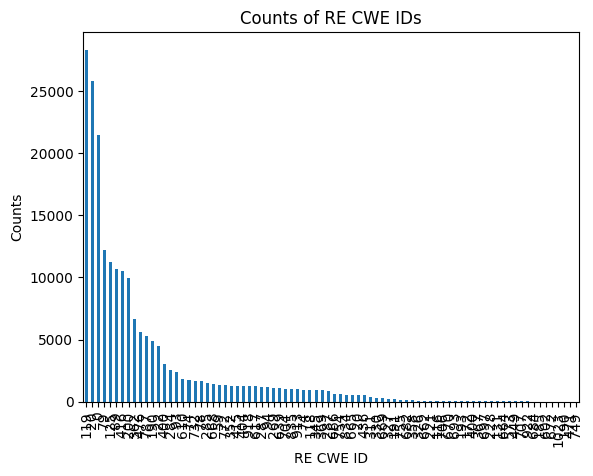

In [31]:
# Count unique values in 'cwe_id' column
cwe_counts = combined_df['re_cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar')
plt.xlabel('RE CWE ID')
plt.ylabel('Counts')
plt.title('Counts of RE CWE IDs')
plt.show()

10398


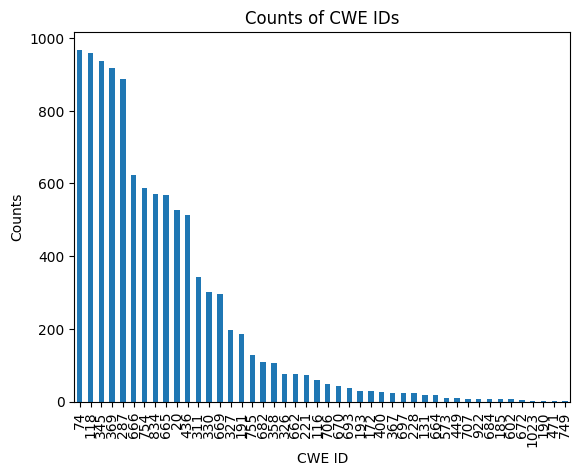

In [32]:
# Filter out 'cwe_id's with count less than minimum_cwe_cnt
filtered_cwes = cwe_counts[cwe_counts < minimum_cwe_cnt]
print(filtered_cwes.sum())
# Plotting
filtered_cwes.plot(kind='bar')
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

In [33]:
final_filtered_cwes_list = filtered_cwes.index.tolist()
final_filtered_cwes_list = sorted([int(item) for item in final_filtered_cwes_list])
print(final_filtered_cwes_list)

[20, 74, 116, 118, 131, 172, 185, 190, 191, 193, 221, 228, 287, 311, 326, 327, 330, 345, 358, 367, 369, 400, 436, 449, 471, 573, 602, 662, 664, 665, 666, 669, 670, 672, 682, 684, 693, 697, 706, 707, 749, 754, 755, 834, 922, 1023]


In [34]:
print(filtered_cwes_list)

[23, 27, 73, 77, 80, 88, 90, 91, 98, 113, 116, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 191, 193, 203, 208, 209, 212, 241, 252, 273, 276, 277, 281, 285, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 324, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 354, 358, 359, 367, 369, 378, 379, 384, 401, 404, 425, 426, 427, 428, 434, 436, 444, 457, 459, 470, 471, 475, 494, 502, 521, 522, 532, 538, 552, 565, 601, 610, 611, 613, 640, 641, 644, 662, 664, 665, 667, 668, 669, 670, 672, 674, 680, 681, 682, 684, 693, 697, 704, 706, 707, 749, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 843, 862, 863, 908, 909, 913, 915, 916, 922, 924, 943, 1021, 1188, 1236, 1321, 1333, 1336]


In [35]:
total_filtered_cwes_list = sorted(list(set(final_filtered_cwes_list+filtered_cwes_list)))
print(len(total_filtered_cwes_list),total_filtered_cwes_list)

161 [20, 23, 27, 73, 74, 77, 80, 88, 90, 91, 98, 113, 116, 118, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 190, 191, 193, 203, 208, 209, 212, 221, 228, 241, 252, 273, 276, 277, 281, 285, 287, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 324, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 354, 358, 359, 367, 369, 378, 379, 384, 400, 401, 404, 425, 426, 427, 428, 434, 436, 444, 449, 457, 459, 470, 471, 475, 494, 502, 521, 522, 532, 538, 552, 565, 573, 601, 602, 610, 611, 613, 640, 641, 644, 662, 664, 665, 666, 667, 668, 669, 670, 672, 674, 680, 681, 682, 684, 693, 697, 704, 706, 707, 749, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 843, 862, 863, 908, 909, 913, 915, 916, 922, 924, 943, 1021, 1023, 1188, 1236, 1321, 1333, 1336]


### Save final dataset

In [36]:
# total_filtered_cwes_list is the list of CWE IDs to filter out
final_df = combined_df[~combined_df['cwe_id'].isin(total_filtered_cwes_list)]
final_df.to_csv(f'{data_path}/MSR_CVEfixes_level3.csv', index=False)
final_df

,code,cwe_id,cve_id,vul,re_cwe_id
15,"ia64_patch_rse (unsigned long start, unsigned ...",119,CVE-2006-3635,1,119
16,setup_arch (char **cmdline_p)\n{\n\tunw_init()...,119,CVE-2006-3635,1,119
17,static int __videobuf_mmap_mapper(struct video...,119,CVE-2007-6761,1,119
18,static int __videobuf_mmap_mapper(struct video...,119,CVE-2007-6761,1,119
19,videobuf_vm_close(struct vm_area_struct *vma)\...,119,CVE-2007-6761,1,119
...,...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1,119
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1,119
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1,200
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1,125


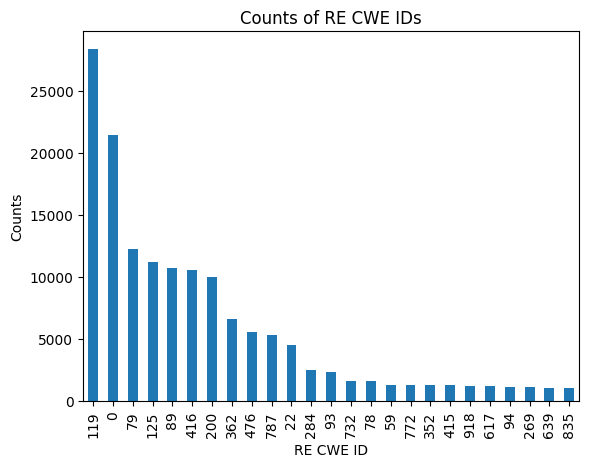

In [37]:
# Count unique values in 'cwe_id' column
cwe_counts = final_df['re_cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar')
plt.xlabel('RE CWE ID')
plt.ylabel('Counts')
plt.title('Counts of RE CWE IDs')
plt.show()

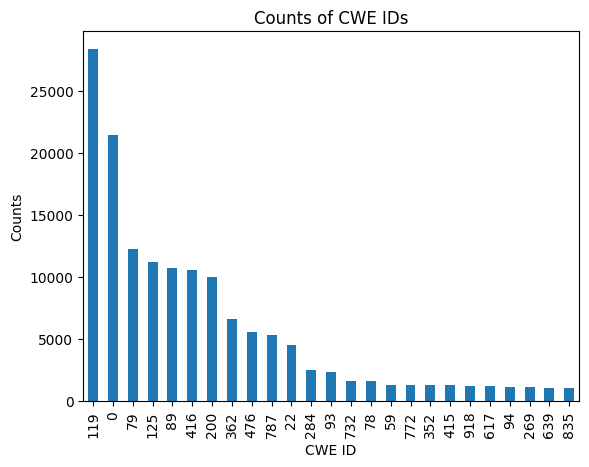

In [38]:
# Count unique values in 'cwe_id' column
cwe_counts = final_df['cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar')
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

### save filtered-out cwe node paths 

In [39]:
# Filter the dictionary
final_cwe_paths = {int(k): v for k, v in cwe_paths.items() if int(k) not in total_filtered_cwes_list}
# filtered_cwe_paths[0] = ['10000-0']

# Save the filtered dictionary back to the JSON file
with open(f'{node_paths_dir}/graph_final_cwe_paths.json', 'w') as file:
    json.dump(final_cwe_paths, file)

In [40]:
len(final_cwe_paths)

48

## Stratified split dataset to train/val/test set by CVE id group

In [41]:
# df = final_df

In [42]:
# # shuffle and split 
# from sklearn.model_selection import GroupShuffleSplit
# import pandas as pd

# # Assuming df is your DataFrame
# # Set the split parameters
# test_size = 0.1
# validation_size = 0.05
# random_state = 42

# # First, split into training + (validation + test)
# gss = GroupShuffleSplit(n_splits=1, test_size=test_size + validation_size, random_state=random_state)
# train_idx, test_validation_idx = next(gss.split(df, groups=df['cve_id']))

# train = df.iloc[train_idx]
# test_validation = df.iloc[test_validation_idx]

# # Now, split the (validation + test) into validation and test
# # Adjust the test_size for this split
# adjusted_test_size = test_size / (test_size + validation_size)
# gss = GroupShuffleSplit(n_splits=1, test_size=adjusted_test_size, random_state=random_state)
# validation_idx, test_idx = next(gss.split(test_validation, groups=test_validation['cve_id']))

# validation = test_validation.iloc[validation_idx]
# test = test_validation.iloc[test_idx]

# # Saving datasets to CSV
# train.to_csv(f'{data_path}/train_dataset.csv', index=False)
# validation.to_csv(f'{data_path}/validation_dataset.csv', index=False)
# test.to_csv(f'{data_path}/test_dataset.csv', index=False)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution
def plot_distribution(dataset, title):
    plt.figure(figsize=(12, 6))
    cwe_counts = dataset['cwe_id'].value_counts()
    sns.barplot(x=cwe_counts.index, y=cwe_counts.values)
    plt.title(title)
    plt.ylabel('Number of Occurrences')
    plt.xlabel('CWE ID')
    plt.xticks(rotation=90)  # Rotates the x-axis labels to be more readable
    plt.show()


In [44]:
# # Plotting for each dataset
# plot_distribution(train, 'Training Set CWE ID Distribution')
# plot_distribution(validation, 'Validation Set CWE ID Distribution')
# plot_distribution(test, 'Test Set CWE ID Distribution')


Notes:

* This approach attempts to balance the cwe_id distribution while respecting cve_id group integrity, but perfect stratification might still be challenging, depending on your data's characteristics.
* This method could be computationally intensive, especially for large datasets.
* The final datasets might still not have a perfect balance of cwe_id due to the constraint of keeping cve_id groups together and the original distribution of the data.
* Depending on your specific needs and the size of your dataset, you might need to tailor this approach or consider alternative methods, such as custom algorithms for more controlled stratification.

In [45]:
df = final_df

In [46]:
from collections import defaultdict

initial_allocation = defaultdict(lambda: {"train": 0, "validation": 0, "test": 0})

for cwe_id, group in df.groupby('cwe_id'):
#     print("cwe_id, group",cwe_id, group)
    # For each cwe_id, allocate the first few cve_id groups to different datasets
    for i, (cve_id, cve_group) in enumerate(group.groupby('cve_id')):
        if i % 11 < 9:
            train = pd.concat([train, cve_group])
            initial_allocation[cwe_id]["train"] += len(cve_group)
        elif i % 11 == 9:
            validation = pd.concat([validation, cve_group])
            initial_allocation[cwe_id]["validation"] += len(cve_group)
        else:
            test = pd.concat([test, cve_group])
            initial_allocation[cwe_id]["test"] += len(cve_group)


NameError: name 'train' is not defined

In [ ]:
remaining_df = df[~df['cve_id'].isin(pd.concat([train, validation, test])['cve_id'])]

if not remaining_df.empty:
    remaining_train, remaining_validation, remaining_test = split_group(remaining_df, len(remaining_df))
    train = pd.concat([train, remaining_train])
    validation = pd.concat([validation, remaining_validation])
    test = pd.concat([test, remaining_test])


In [ ]:
train = train.sample(frac=1, random_state=random_state).reset_index(drop=True)
validation = validation.sample(frac=1, random_state=random_state).reset_index(drop=True)
test = test.sample(frac=1, random_state=random_state).reset_index(drop=True)

train.to_csv(f'{data_path}/train_dataset.csv', index=False)
validation.to_csv(f'{data_path}/validation_dataset.csv', index=False)
test.to_csv(f'{data_path}/test_dataset.csv', index=False)


In [ ]:
train.shape[0], validation.shape[0], test.shape[0]

In [ ]:
# Plotting for each dataset
plot_distribution(train, 'Training Set CWE ID Distribution')
plot_distribution(validation, 'Validation Set CWE ID Distribution')
plot_distribution(test, 'Test Set CWE ID Distribution')


In [ ]:
# Desired total sample size
target_sample_size = 5000

# Calculate the number of unique CWE IDs
num_unique_cwe_ids = validation['cwe_id'].nunique()

# Calculate how many samples to take per CWE ID
samples_per_cwe_id = target_sample_size // num_unique_cwe_ids

# Sample the rows
balanced_validation = pd.DataFrame()

for cwe_id in validation['cwe_id'].unique():
    # If there are not enough samples for a particular cwe_id, take all available
    samples_to_take = min(samples_per_cwe_id, len(validation[validation['cwe_id'] == cwe_id]))
    sampled_group = validation[validation['cwe_id'] == cwe_id].sample(n=samples_to_take, random_state=random_state)
    balanced_validation = pd.concat([balanced_validation, sampled_group])

# Check if we have reached the target sample size
current_sample_size = len(balanced_validation)

# If the current sample size is less than the target, fill in the remaining with random samples from the validation set
if current_sample_size < target_sample_size:
    additional_samples = validation.sample(n=target_sample_size - current_sample_size, random_state=random_state)
    balanced_validation = pd.concat([balanced_validation, additional_samples])

# Shuffle the balanced validation set
balanced_validation = balanced_validation.sample(frac=1, random_state=random_state).reset_index(drop=True)

# Update the validation DataFrame
validation = balanced_validation

# Output the sampled DataFrame
validation.to_csv(f'{data_path}/balanced_validation_dataset.csv', index=False)


In [ ]:
validation.shape

In [ ]:
plot_distribution(validation, 'Balanced Validation Set CWE ID Distribution')

In [ ]:
train.shape[0], validation.shape[0], test.shape[0]